## In-depth Introduction
First let's import the module and create an environment.

In [37]:
from kaggle.competitions import twosigmanews
# You can only call make_env() once, so don't lose it!
env = twosigmanews.make_env()

Loading the data... This could take a minute.
Done!


## **`get_training_data`** function

Returns the training data DataFrames as a tuple of:
* `market_train_df`: DataFrame with market training data
* `news_train_df`: DataFrame with news training data

These DataFrames contain all market and news data from February 2007 to December 2016.  See the [competition's Data tab](https://www.kaggle.com/c/two-sigma-financial-news/data) for more information on what columns are included in each DataFrame.

In [38]:
(market_train_df, news_train_df) = env.get_training_data()

In [ ]:
market_train_df.head()

In [ ]:
market_train_df.tail()

In [ ]:
news_train_df.head()

In [ ]:
news_train_df.tail()

In [ ]:
market_train_df.shape

In [ ]:
#divide into 3 classes
from scipy.stats import describe
import numpy as np
import matplotlib.pyplot as plt
returns = market_train_df['returnsOpenNextMktres10']
valid_idx = np.abs(returns) < 0.4
valid_returns = returns[valid_idx]
market_train_df = market_train_df[valid_idx]
print(describe(returns))
cutoff_1 = valid_returns.quantile(0.33)
cutoff_2 = valid_returns.quantile(0.66)
return_class = np.zeros(market_train_df.shape[0])
return_class[valid_returns < cutoff_1] = -1
return_class[valid_returns > cutoff_2] = 1
market_train_df['class'] = return_class
market_train_df.drop(columns = ['returnsClosePrevMktres10', 'returnsOpenPrevMktres10'])
print ('Done')

In [ ]:
print(len(valid_returns))
len(returns)

In [ ]:
import pandas as pd

#First, assign label to each piece of news
#The label is the accumulated return over the next 10 business days after the news is released
text = news_train_df['headline']
num_rows = news_train_df.shape[0]
labels = np.ones(num_rows)
for i in range(num_rows):
    x = news_train_df.iloc[i]
    tmp = market_train_df[(market_train_df['time'] > x['time']) & (market_train_df['assetCode'].isin(list(eval(x['assetCodes']))))]
    tmp = tmp[np.asarray([diff.days for diff in tmp.time - x.time]) <= 10]
    labels[i] = np.prod([(1+num) for num in tmp.returnsOpenNextMktres10]) 
print ('Done')

In [ ]:
#Encode the news data
import chakin
# chakin.search(lang="English")
chakin.download(number=21)
print ('Done')

In [26]:
import pandas as pd
basic = pd.read_csv('../input/sector/basic industries.csv')['Symbol']
capital = pd.read_csv('../input/sector/capital_goods.csv')['Symbol']
prod = pd.read_csv('../input/sector/consumer products.csv')['Symbol']
service = pd.read_csv('../input/sector/consumer service.csv')['Symbol']
energy = pd.read_csv('../input/sector/energy.csv')['Symbol']
finance = pd.read_csv('../input/sector/finance.csv')['Symbol']
healthcare = pd.read_csv('../input/sector/healthcare.csv')['Symbol']
misc = pd.read_csv('../input/sector/miscellaneous.csv')['Symbol']
tech = pd.read_csv('../input/sector/technology.csv')['Symbol']
transport = pd.read_csv('../input/sector/transportation.csv')['Symbol']
utility = pd.read_csv('../input/sector/utilities.csv')['Symbol']
sectors = [basic, capital, prod, service, energy, finance, healthcare, misc,
          tech, transport, utility]
print ('Done')

Done


In [27]:
#sector name cleaning
for i, sec in enumerate(sectors):
    for j, name in enumerate(sec):
        sectors[i][j] = sectors[i][j].strip()
    sectors[i] = set(sectors[i])
print ('Done')

Done


In [44]:
import numpy as np
num_rows = market_train_df.shape[0]
industry_class = np.zeros(num_rows)
for i in range(num_rows):
    if i % 500000 == 0:
        print ('step ' + str(i//500000) + ' is done')
    name = market_train_df.loc[i, 'assetCode']
    name = name[:name.find('.')] if name.find('.') != -1 else name
    for j, sec in enumerate(sectors):
        if name in sec:
            industry_class[i] = j + 1
            break
print ('Done')

step 0 is done
step 1 is done
step 2 is done
step 3 is done
step 4 is done
step 5 is done
step 6 is done
step 7 is done
step 8 is done
Done


In [53]:
industry_class
market_train_df.iloc[1]

0       AIRT
1       ATSG
2        ALK
3       ALGT
4        AAL
5       ARCB
6        ASC
7       AAWW
8        AVH
9       AZUL
10      BSTI
11       BCO
12       BRS
13      CHRW
14       CNI
15        CP
16      CPLP
17       CEA
18       ZNH
19      VLRS
20       CPA
21      CAAP
22      CMRE
23      CVTI
24      CYRX
25     CYRXW
26       CSX
27       DAC
28       DAL
29       DHT
       ...  
92      STNG
93       CKH
94      SMHI
95      SHIP
96     SHIPW
97       SSW
98      SSWA
99      SSWN
100      SFL
101     SINO
102     SKYW
103      LUV
104     SAVE
105     SBLK
106    SBLKZ
107     GASS
108       TK
109     TOPS
110     TRMD
111      TNP
112      USX
113      UNP
114      UAL
115      UPS
116      ULH
117     USAK
118     USDP
119     WERN
120     YRCW
121      ZTO
Name: Symbol, Length: 122, dtype: object

(array([1416808.,  265270.,  175496.,  547094.,  234348.,  416559.,
         272941.,   84578.,  376463.,  283399.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

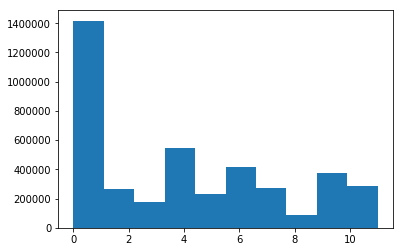

In [50]:
import matplotlib.pyplot as plt
plt.hist(industry_class)

In [ ]:
#industry classification for news data
import numpy as np
topic_codes = news_train_df['subjects']
industry_codes = set(["ADV","APL","BIOT","BUS","DPR","ELI","GDM","IND",
                      "MAC","MUL","REAM","RRL","STL","TEX","WWW",
                      "AER","AUT","BLD","CHE","DRU","FIN","GSFT",
                      "INS","MET","PUB","REC","SHP","TEL","TIM",
                      "AIR","BEV","BNK","CON","ELC","FOD","HDWR",
                      "LEI","MIS","REA","RET","SFWR","TBCS","WHO"])

sectors = [basic, capital, prod, service, energy, finance, healthcare, misc,
          tech, transport, utility]

GICS = ['Communication services','Consumer discretionary','Consumer staples','Energy','Financials',
        'Health care','Industrials','Information technology','Materials','Real estate','Utilities']

com = ['ELC','TEL']
disc = ['ADV','APL','AUT','LEI','PUB','REC','RET','TBCS','TEX']
staples = ['BEV','FOD',] 
energy = ['ENR','ENQ',]
fin = ['BNK','FIN','INS']
health = ['BIOT','DRU',]
ind = ['AER','AIR','BLD','BUS','CON','IND','RRL','SHP','WHO']
info = ['DPR','ELI','GSFT','HDWR','SFWR','WWW']
material = ['CHE','GDM','MAC','MET','MIS','STL','TIM',]
estate = ['REA','REAM']
util = ['ELG']
general = ['MUL']
sector_list = [com,disc,staples,energy,fin,health,ind,info,material,
              estate,util]
industry_class = np.zeros(len(topic_codes))
for i,topic in enumerate(topic_codes):
    for j,sector_codes in enumerate(sector_list):
        if topic in sector_codes:
            industry_class[i] = j + 1
print ('Done')


In [ ]:
industry_class

In [ ]:
#check if every news data point has industry code
num_missing_ind = 0
idx = []
for i, val in enumerate(topic_codes):
    if i % 500000 == 0:
        print ("step " + str(i//500000) + " is done!")
    topics = eval(val)
    flag = False
    for item in topics:
        if item in industry_codes:
            flag = True
        if flag == True:
            continue
    if flag == False:
        num_missing_ind += 1
        idx.append(i)
print ('Done')
        

In [ ]:
len(idx)/len(topic_codes)
news_train_df.iloc[0]

i## `get_prediction_days` function

Generator which loops through each "prediction day" (trading day) and provides all market and news observations which occurred since the last data you've received.  Once you call **`predict`** to make your future predictions, you can continue on to the next prediction day.

Yields:
* While there are more prediction day(s) and `predict` was called successfully since the last yield, yields a tuple of:
    * `market_observations_df`: DataFrame with market observations for the next prediction day.
    * `news_observations_df`: DataFrame with news observations for the next prediction day.
    * `predictions_template_df`: DataFrame with `assetCode` and `confidenceValue` columns, prefilled with `confidenceValue = 0`, to be filled in and passed back to the `predict` function.
* If `predict` has not been called since the last yield, yields `None`.

In [ ]:
# You can only iterate through a result from `get_prediction_days()` once
# so be careful not to lose it once you start iterating.
days = env.get_prediction_days()

In [ ]:
(market_obs_df, news_obs_df, predictions_template_df) = next(days)

In [ ]:
market_obs_df.head()

In [ ]:
news_obs_df.head()

In [ ]:
predictions_template_df.head()

Note that we'll get an error if we try to continue on to the next prediction day without making our predictions for the current day.

In [ ]:
next(days)

### **`predict`** function
Stores your predictions for the current prediction day.  Expects the same format as you saw in `predictions_template_df` returned from `get_prediction_days`.

Args:
* `predictions_df`: DataFrame which must have the following columns:
    * `assetCode`: The market asset.
    * `confidenceValue`: Your confidence whether the asset will increase or decrease in 10 trading days.  All values must be in the range `[-1.0, 1.0]`.

The `predictions_df` you send **must** contain the exact set of rows which were given to you in the `predictions_template_df` returned from `get_prediction_days`.  The `predict` function does not validate this, but if you are missing any `assetCode`s or add any extraneous `assetCode`s, then your submission will fail.

Let's make random predictions for the first day:

In [ ]:
import numpy as np
def make_random_predictions(predictions_df):
    predictions_df.confidenceValue = 2.0 * np.random.rand(len(predictions_df)) - 1.0

In [ ]:
make_random_predictions(predictions_template_df)
env.predict(predictions_template_df)

Now we can continue on to the next prediction day and make another round of random predictions for it:

In [ ]:
(market_obs_df, news_obs_df, predictions_template_df) = next(days)

In [ ]:
market_obs_df.head()

In [ ]:
news_obs_df.head()

In [ ]:
predictions_template_df.head()

In [ ]:
make_random_predictions(predictions_template_df)
env.predict(predictions_template_df)

## Main Loop
Let's loop through all the days and make our random predictions.  The `days` generator (returned from `get_prediction_days`) will simply stop returning values once you've reached the end.

In [ ]:
for (market_obs_df, news_obs_df, predictions_template_df) in days:
    make_random_predictions(predictions_template_df)
    env.predict(predictions_template_df)
print('Done!')

## **`write_submission_file`** function

Writes your predictions to a CSV file (`submission.csv`) in the current working directory.

In [ ]:
env.write_submission_file()

In [ ]:
# We've got a submission file!
import os
print([filename for filename in os.listdir('.') if '.csv' in filename])

As indicated by the helper message, calling `write_submission_file` on its own does **not** make a submission to the competition.  It merely tells the module to write the `submission.csv` file as part of the Kernel's output.  To make a submission to the competition, you'll have to **Commit** your Kernel and find the generated `submission.csv` file in that Kernel Version's Output tab (note this is _outside_ of the Kernel Editor), then click "Submit to Competition".  When we re-run your Kernel during Stage Two, we will run the Kernel Version (generated when you hit "Commit") linked to your chosen Submission.

## Restart the Kernel to run your code again
In order to combat cheating, you are only allowed to call `make_env` or iterate through `get_prediction_days` once per Kernel run.  However, while you're iterating on your model it's reasonable to try something out, change the model a bit, and try it again.  Unfortunately, if you try to simply re-run the code, or even refresh the browser page, you'll still be running on the same Kernel execution session you had been running before, and the `twosigmanews` module will still throw errors.  To get around this, you need to explicitly restart your Kernel execution session, which you can do by pressing the Restart button in the Kernel Editor's bottom Console tab:
![Restart button](https://i.imgur.com/hudu8jF.png)